In [1]:
import sys
import numpy as np
import numpy.ma as ma
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import cmocean
import glob

%matplotlib inline


/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/xarray/core/merge.py:16: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [2]:
#params

plot_N2_profiles=True


In [3]:
config='EU36'
case='MPC001'
freq='1d'
year='2011'

datadir='/scratch/cnt0024/hmg2840/colombo/'+str(config)+'/'+str(config)+'-'+str(case)+'-S/'+str(freq)+'/'+str(year)+'/'
#!ls $datadir
gridfile='/scratch/cnt0024/hmg2840/colombo/EU36/EU36-I/coordinates_EU36.nc'
maskfile='/scratch/cnt0024/hmg2840/colombo/EU36/EU36-I/EU36.L75_mesh_mask.nc'


In [4]:
dsgrid=xr.open_dataset(gridfile)
dsmask=xr.open_dataset(maskfile)

In [28]:
def compute_N2(tem,sal,e3w,pdep):
    tem_up=tem
    sal_up=sal
    tem_down=tem.shift(deptht=1)
    sal_down=sal.shift(deptht=1)
    zt=0.5*(tem_up+tem_down)
    zs=0.5*(sal_up+sal_down)
    zh=pdep
    zht=zh.rename({'nav_lev':'deptht'})
    e3=e3w
    e3t=e3.rename({'nav_lev':'deptht'})
    zalbet = (((-0.255019e-07*zt+0.298357e-05)*zt-0.203814e-03)*zt+0.170907e-01+0.665157e-01+(-0.678662e-05*zs-0.846960e-04*zt+0.378110e-02)*zs+(-0.302285e-13*zht-0.251520e-11*zs+0.512857e-12*zt*zt)*zht-0.164759e-06*zs+(0.791325e-08*zt-0.933746e-06)*zt+0.380374e-04)*zht
    zbeta = ((-0.415613e-09*zt+0.555579e-07)*zt-0.301985e-05)*zt+0.785567e-03+(0.515032e-08*zs+0.788212e-08*zt-0.356603e-06)*zs+((0.121551e-17*zht-0.602281e-15*zs-0.175379e-14*zt+0.176621e-12)*zht+0.408195e-10*zs+ (- 0.213127e-11*zt+0.192867e-09)*zt-0.121555e-07)*zht
    bn2=e3t*zbeta*(zalbet *(tem_up-tem_down) - (sal_up - sal_down))
    return bn2
    

In [29]:
ds=xr.open_dataset('/scratch/cnt0024/hmg2840/colombo/EU36/EU36-MPC001-S/1d/2011/EU36-MPC001_y2011m07d01.1d_gridT.nc', chunks={'x':700,'y':1000,'time_counter':1,'deptht':1})
tem=ds.votemper[0]
sal=ds.vosaline[0]
mask=dsmask.tmask[0]
e3w=dsmask.e3w_0[0]
gdepw=dsmask.gdepw_0[0]
bn2=compute_N2(tem,sal,e3w,gdepw)

/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


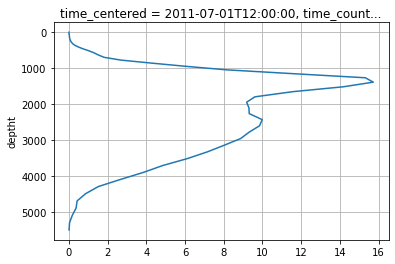

In [7]:

bn2.mean(dim='x').mean(dim='y').plot(y='deptht', yincrease=False)
plt.grid()

/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


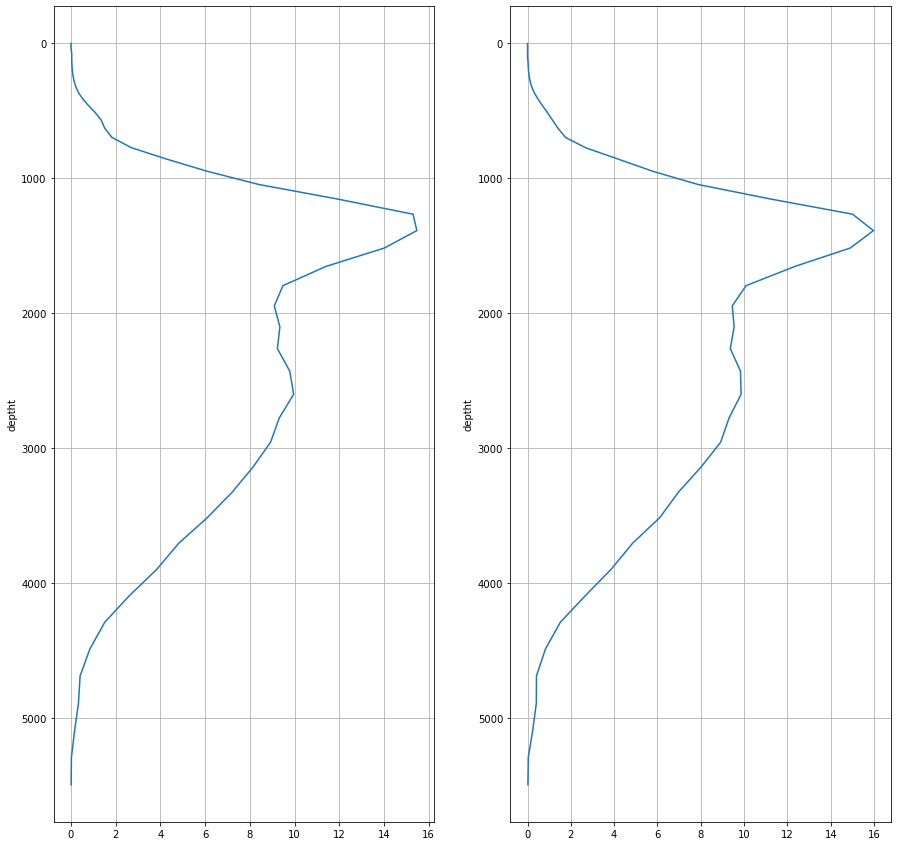

In [8]:
fig, axes = plt.subplots(1,2,figsize=(15,15))
axes = axes.ravel()
ds=xr.open_dataset('/scratch/cnt0024/hmg2840/colombo/EU36/EU36-MPC001-S/1d/2011/EU36-MPC001_y2011m09d01.1d_gridT.nc', chunks={'x':700,'y':1000,'time_counter':1,'deptht':1})
tem=ds.votemper
sal=ds.vosaline
mask=dsmask.tmask[0]
e3w=dsmask.e3w_0[0]
gdepw=dsmask.gdepw_0[0]
bn2=compute_N2(tem,sal,e3w,gdepw)
ax1=axes[0]
bn2.mean(dim='time_counter').mean(dim='x').mean(dim='y').plot(y='deptht', yincrease=False,ax=ax1)
ax1.grid()

ds=xr.open_dataset('/scratch/cnt0024/hmg2840/colombo/EU36/EU36-MPC001-S/1d/2011/EU36-MPC001_y2011m03d01.1d_gridT.nc', chunks={'x':700,'y':1000,'time_counter':1,'deptht':1})
tem=ds.votemper
sal=ds.vosaline
mask=dsmask.tmask[0]
e3w=dsmask.e3w_0[0]
gdepw=dsmask.gdepw_0[0]
bn2=compute_N2(tem,sal,e3w,gdepw)
ax2=axes[1]
bn2.mean(dim='time_counter').mean(dim='x').mean(dim='y').plot(y='deptht', yincrease=False,ax=ax2)
ax2.grid()


In [9]:
ds=xr.open_dataset('/scratch/cnt0024/hmg2840/albert7a/tests/bn2.nc')

In [11]:
bn2_cdf=ds.vobn2

In [12]:
bn2


<xarray.DataArray (deptht: 75, y: 1718, x: 732, time_counter: 1)>
dask.array<shape=(75, 1718, 732, 1), dtype=float64, chunksize=(1, 1000, 700, 1)>
Coordinates:
  * deptht         (deptht) float32 0.50576 1.5558553 ... 5698.0605 5902.0576
  * time_counter   (time_counter) datetime64[ns] 2011-03-01T12:00:00
    nav_lat        (y, x) float32 dask.array<shape=(1718, 732), chunksize=(1000, 700)>
    nav_lon        (y, x) float32 dask.array<shape=(1718, 732), chunksize=(1000, 700)>
    time_centered  (time_counter) datetime64[ns] dask.array<shape=(1,), chunksize=(1,)>
Dimensions without coordinates: y, x

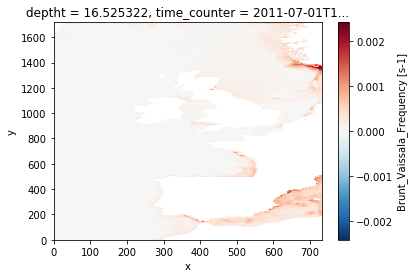

In [24]:
bn2_cdf[0,10].plot()

In [33]:
bn2_cdf

<xarray.DataArray 'vobn2' (time_counter: 1, deptht: 75, y: 1718, x: 732)>
array([[[[nan, ..., nan],
         ...,
         [nan, ..., nan]],

        ...,

        [[nan, ..., nan],
         ...,
         [nan, ..., nan]]]], dtype=float32)
Coordinates:
  * deptht        (deptht) float32 0.50576 1.5558553 ... 5698.0605 5902.0576
  * time_counter  (time_counter) datetime64[ns] 2011-07-01T12:00:00
Dimensions without coordinates: y, x
Attributes:
    units:             s-1
    valid_min:         0.0
    valid_max:         50000.0
    long_name:         Brunt_Vaissala_Frequency
    short_name:        vobn2
    iweight:           1
    online_operation:  N/A
    axis:              TZYX
    savelog10:         0.0

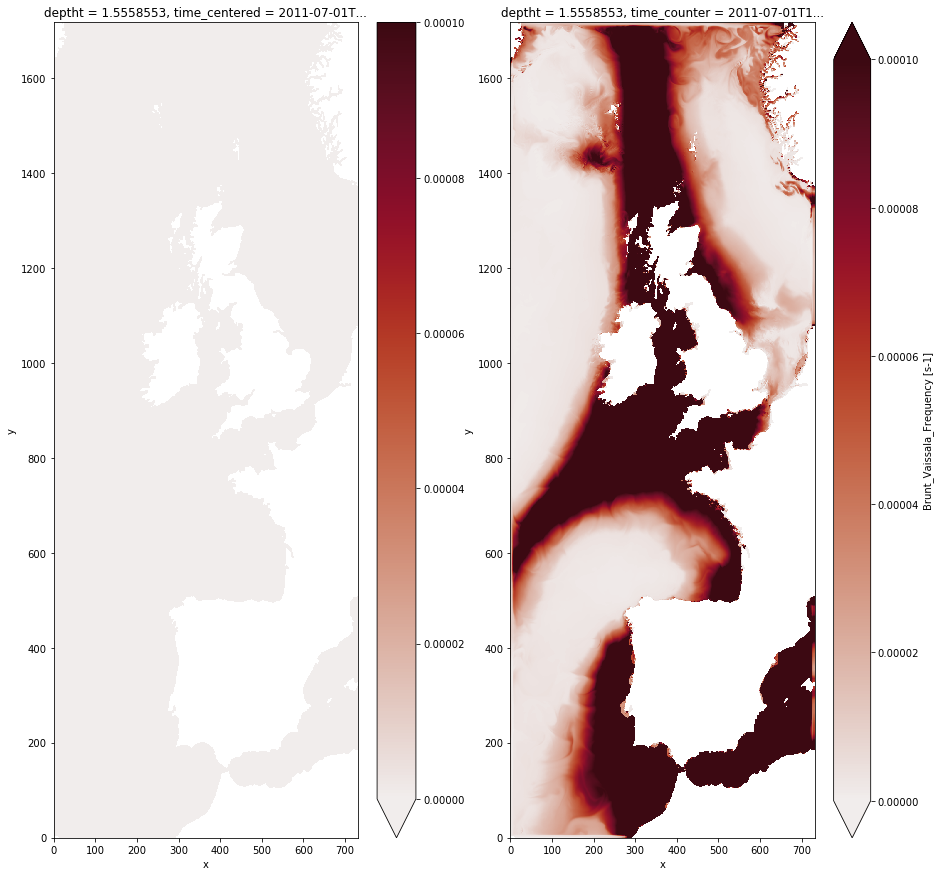

In [34]:
fig, axes = plt.subplots(1,2,figsize=(15,15))
axes = axes.ravel()

ax1=axes[0]
bn2[1].plot(ax=ax1,vmin=0,vmax=0.0001,cmap='cmo.amp')

ax2=axes[1]
bn2_cdf[0,1].plot(ax=ax2,vmin=0,vmax=0.0001,cmap='cmo.amp')



In [18]:
bn2[0].mean(dim='time_counter').max().values

array(0.00030082)